## Lead Scoring Case Study

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
leads = pd.read_csv("Leads.csv")

In [4]:
# Let's take a look at the first few rows
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Summary of the dataset: 9240 rows, 37 columns, null values in the following columns:

# TotalVisits, Page Views Per Visit,Last Activity
# How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course
# Lead Quality,Lead Profile, Specialization, City, Country   
# Asymmetrique Activity Index, Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score

print(leads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### Understanding the Data Dictionary



In [6]:
leads['Lead Origin'].astype('category').value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [7]:
# Since we have a very small number for Lead Import and Quick Add Form - changing it to Others
leads.loc[leads['Lead Origin'].isin ([ 'Lead Import','Quick Add Form']),'Lead Origin'] = 'Others'

In [8]:
leads['Lead Origin'].astype('category').value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Others                       56
Name: Lead Origin, dtype: int64

In [9]:
leads['Lead Source'].astype('category').value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [10]:
# For all Lead Sources with a value less than 100 - changing them to Others,
leads.loc[leads['Lead Source'].isin ([ 'Facebook','bing','google','Click2call','Press_Release','Social Media','Live Chat','Pay per Click Ads','welearnblog_Home','NC_EDM','WeLearn','blog','testone','youtubechannel']),'Lead Source'] = 'Others'

In [11]:
leads['Lead Source'].astype('category').value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                83
Name: Lead Source, dtype: int64

In [12]:
# we see 5 unknwn here which could be treated as Blank
leads['Country'].astype('category').value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Belgium                    2
Bangladesh                 2
China                      2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Netherlands                2
Philippines                2
Uganda                     2
Indonesia                  1
Kenya                      1
Liberia                    1
Vietnam                    1
Denmark                    1
Russia                     1
Sri Lanka     

In [13]:
# Finding the count of all countries with either 'unknown' or missing
leads['Country'].isnull().sum() + (leads['Country']=='unknown').sum()

2466

In [14]:
# Convert all missing countries to 'unknown'
leads.loc[leads['Country'].isnull(),'Country'] = 'unknown'

In [15]:
# Since the count of all non India countries is very low, classifying all of them as others
leads.loc[~leads['Country'].isin ([ 'India','unknown']),'Country'] = 'others'

In [16]:
leads['Country'].astype('category').value_counts()

India      6492
unknown    2466
others      282
Name: Country, dtype: int64

In [17]:
leads['Last Activity'].astype('category').value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [18]:
# For all Last Activity with a value less than 100 - changing them to Others,
leads.loc[leads['Last Activity'].isin ([ 'Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow']),'Last Activity'] = 'Others'

In [19]:
leads['Last Activity'].astype('category').value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [20]:
# We see 1942 Select here which should be considered as blank as No value was Selected
leads['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# Checking the percentage of missing values (This includes 'Select' also)
round(100*((leads['Specialization'].isnull().sum() + (leads['Specialization']=='Select').sum())/len(leads.index)), 2)

36.58

In [22]:
# Since we have a very high percentage of missing values for this columnn, we can drop it for our analysis
leads = leads.drop(['Specialization'], axis=1)

In [23]:
# We see 5043 Select here which should be considered as blank as No value was Selected
leads['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [24]:
# Checking the percentage of missing values (This includes 'Select' also)
round(100*((leads['How did you hear about X Education'].isnull().sum() + (leads['How did you hear about X Education']=='Select').sum())/len(leads.index)), 2)

78.46

In [25]:
# Since we have a very high percentage of missing values for this columnn, we can drop it for our analysis
leads = leads.drop(['How did you hear about X Education'], axis=1)

In [26]:
leads['What is your current occupation'].astype('category').value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
# For Housewife and Businessman - clubbing them with Other,
leads.loc[leads['What is your current occupation'].isin ([ 'Housewife','Businessman']),'What is your current occupation'] = 'Other'

In [28]:
leads['What is your current occupation'].astype('category').value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [29]:
# Convert all missing Occupation to 'unknown'
leads.loc[leads['What is your current occupation'].isnull(),'What is your current occupation'] = 'unknown'

In [30]:
leads['What matters most to you in choosing a course'].astype('category').value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# Since we primarily see a single value for this columnn, we can drop it for our analysis
leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

In [32]:
leads['Tags'].astype('category').value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [33]:
# For values with count < 100 - classifying them as Others
leads.loc[leads['Tags'].isin ([ 'invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)']),'Tags'] = 'Others'

In [34]:
leads['Tags'].astype('category').value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [35]:
leads['Lead Quality'].astype('category').value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [36]:
# We see 4146 Select here which should be considered as blank as No value was Selected
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [37]:
# Checking the percentage of missing values (This includes 'Select' also)
round(100*((leads['Lead Profile'].isnull().sum() + (leads['Lead Profile']=='Select').sum())/len(leads.index)), 2)

74.19

In [38]:
# Since we have a very high percentage of missing values for this columnn, we can drop it for our analysis
leads = leads.drop(['Lead Profile'], axis=1)

In [39]:
# We see 2249 Select here which should be considered as blank as No value was Selected
leads['City'].astype('category').value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [40]:
# Checking the percentage of missing values (This includes 'Select' also)
round(100*((leads['City'].isnull().sum() + (leads['City']=='Select').sum())/len(leads.index)), 2)

39.71

In [41]:
# Since we have a very high percentage of missing values for this columnn, we can drop it for our analysis. Also - the other cities are either Mumbai or Non-Mumbai
leads = leads.drop(['City'], axis=1)

In [42]:
leads['Asymmetrique Activity Index'].astype('category').value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [43]:
leads['Asymmetrique Activity Score'].astype('category').value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [44]:
#Let us see if there is any relationship between Asymmetrique Activity Index and Asymmetrique Activity Score
# We find that 
# High : 16, 17, 18
# Medium : 13, 14, 15
# Low : 7,8,9,10,11,12

group = leads.groupby('Asymmetrique Activity Index')

df2 = group.apply(lambda x: x['Asymmetrique Activity Score'].unique())
df2

Asymmetrique Activity Index
01.High                     [17.0, 16.0, 18.0]
02.Medium                   [15.0, 14.0, 13.0]
03.Low       [11.0, 12.0, 10.0, 9.0, 8.0, 7.0]
dtype: object

In [45]:
# The above analysis indicates that using both the columns would be redundant. Hence, we will drop 'Asymmetrique Activity Score'
leads = leads.drop(['Asymmetrique Activity Score'], axis=1)

In [46]:
leads['Asymmetrique Profile Index'].astype('category').value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [47]:
leads['Asymmetrique Profile Score'].astype('category').value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [48]:
#Let us see if there is any relationship between Asymmetrique Activity Index and Asymmetrique Activity Score
# We find that 
# High : 17, 18, 19, 20
# Medium : 13, 14, 15, 16
# Low : 11,12

group2 = leads.groupby('Asymmetrique Profile Index')

df3 = group2.apply(lambda x: x['Asymmetrique Profile Score'].unique())
df3

Asymmetrique Profile Index
01.High      [20.0, 17.0, 18.0, 19.0]
02.Medium    [15.0, 14.0, 16.0, 13.0]
03.Low                   [12.0, 11.0]
dtype: object

In [49]:
# The above analysis indicates that using both the columns would be redundant. Hence, we will drop 'Asymmetrique Profile Score'
leads = leads.drop(['Asymmetrique Profile Score'], axis=1)

In [50]:
leads['Last Notable Activity'].astype('category').value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Email Received                     1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [51]:
# For values with count < 100 - classifying them as Others
leads.loc[leads['Last Notable Activity'].isin ([ 'Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','View in browser link Clicked','Resubscribed to emails','Form Submitted on Website','Email Received','Approached upfront']),'Last Notable Activity'] = 'Others'

In [52]:
leads['Last Notable Activity'].astype('category').value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

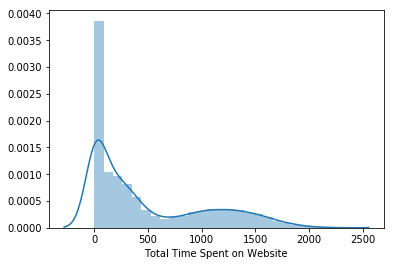

In [53]:
sns.distplot(leads['Total Time Spent on Website'])
plt.show()

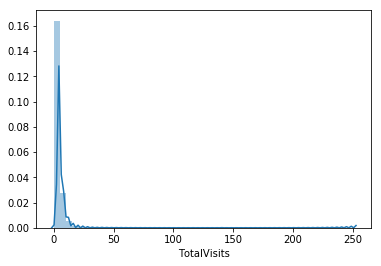

In [54]:
# We observe that there are few blank values for TotalVisits. This is for cases where Lead Origin is not 'Landing Page Submission'
# In such cases, we can replace these blank values with 0 without negatively impacting the Data Quality
leads['TotalVisits'] = leads['TotalVisits'].fillna(0)
leads['TotalVisits'] = leads['TotalVisits'].astype(np.int64)
sns.distplot(leads['TotalVisits'])
plt.show()

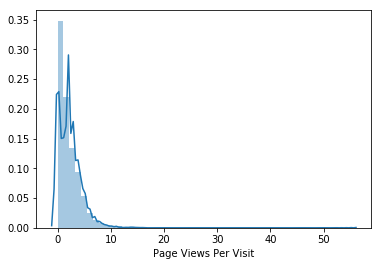

In [55]:
# We observe that there are few blank values for 'Page Views Per Visit'. This is for cases where Lead Origin is not 'Landing Page Submission'
# In such cases, we can replace these blank values with 0 without negatively impacting the Data Quality

leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(0)
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].astype(np.int64)
sns.distplot(leads['Page Views Per Visit'])
plt.show()

#### Eliminating columns with single values

In [56]:
# Finding variables with single value

leads.columns[ leads.nunique()==1 ]

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [57]:
# Dropping columns which have a single value
leads = leads.drop(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'], axis=1)

In [58]:
leads.shape

(9240, 25)

#### Finding number values for each type for Columns with binary values

In [59]:
leads['Do Not Email'].astype('category').value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [60]:
leads['Do Not Call'].astype('category').value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [61]:
leads['Search'].astype('category').value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [62]:
leads['Newspaper Article'].astype('category').value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [63]:
leads['Newspaper'].astype('category').value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [64]:
leads['Digital Advertisement'].astype('category').value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [65]:
leads['Through Recommendations'].astype('category').value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [66]:
leads['A free copy of Mastering The Interview'].astype('category').value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [67]:
leads['X Education Forums'].astype('category').value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

#### Dropping columns which largely have a single value

In [68]:
leads = leads.drop(['Do Not Call', 'Search',
       'Newspaper Article', 'Newspaper','Digital Advertisement','Through Recommendations',
       'X Education Forums'], axis=1)

#### Converting remaining binary variables (Yes/No) to 0/1

In [69]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads[varlist] = leads[varlist].apply(binary_map)

In [70]:
# Adding up the missing values (column-wise)
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                              103
Country                                      0
What is your current occupation              0
Tags                                      3353
Lead Quality                              4767
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [71]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.11
Country                                    0.00
What is your current occupation            0.00
Tags                                      36.29
Lead Quality                              51.59
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [72]:
# Removing all the rows with null values for 'Lead Source' and  'Last Activity' as this will remove only a very small number of rows but improve the overall data quality 
leads = leads.dropna(axis=0, subset=['Lead Source','Last Activity'])

In [73]:
# Let us Drop few other columns 

# Dropping 'Tags' as it has > 36% missing values and does not appear to have a significant useful data
# Dropping 'Lead Quality' as it has > 51% missing values and appears as a value probably inputted by the Sales person on his/her estimation of the convertibility of the lead

# Dropping 'Asymmetrique Activity Index' and 'Asymmetrique Profile Index' as it has > 45% missing values. Though it appears that they might be of significant business value, retaining it would
# mean that we eliminate 45% rows from our data set OR assign some value to all the rows which has missing value for these columns. This could potentially impact the model
# and hence it is not recommended to assign any random value to the missing columns

leads = leads.drop(['Tags', 'Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1)

In [74]:
# Adding up the missing values (column-wise)
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [75]:
# Now that we have removed/converted all missing values and dropped all the unwarranted columns, let us examine our dataset
leads.shape

(9103, 14)

#### Data Exploration



In [76]:
# All numeric (float and int) variables in the dataset
leads_numeric = leads.select_dtypes(include=['float64', 'int64'])
leads_numeric.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,660737,0,0,0,0,0,0
1,660728,0,0,5,674,2,0
2,660727,0,1,2,1532,2,1
3,660719,0,0,1,305,1,0
4,660681,0,1,2,1428,1,0


Here,we can see, `Lead Number` isn't of any use to building a logistic regression model. Hence, we drop it.

In [77]:
leads = leads.drop(['Lead Number'], axis=1)

In [78]:
# Subset all categorical variables
leads_categorical = leads.select_dtypes(include=['object'])
leads_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Country,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,unknown,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,India,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,India,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Others,India,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,India,Unemployed,Modified


Here,we can see, `Prospect ID` isn't of any use to building a logistic regression model. Hence, we drop it.

In [79]:
leads = leads.drop(['Prospect ID'], axis=1)

In [80]:
# Dropping Lead Number and Prospect ID
leads_numeric = leads_numeric.drop(['Lead Number'], axis=1)
leads_numeric.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0
1,0,0,5,674,2,0
2,0,1,2,1532,2,1
3,0,0,1,305,1,0
4,0,1,2,1428,1,0


In [81]:
leads_categorical = leads_categorical.drop(['Prospect ID'], axis=1)
leads_categorical.head()

,Lead Origin,Lead Source,Last Activity,Country,What is your current occupation,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,unknown,Unemployed,Modified
1,API,Organic Search,Email Opened,India,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Student,Email Opened
3,Landing Page Submission,Direct Traffic,Others,India,Unemployed,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Unemployed,Modified


Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

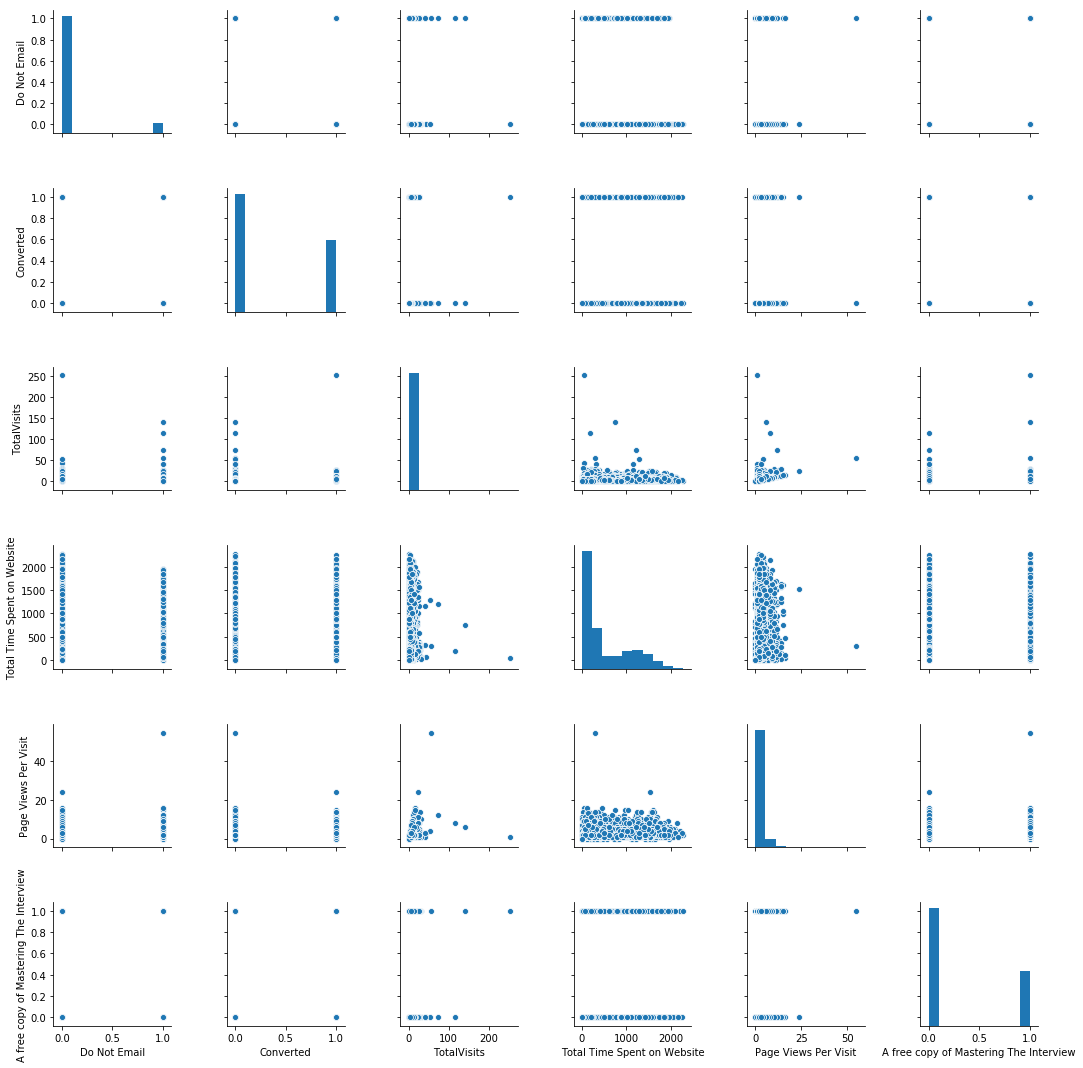

In [82]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(leads_numeric)
plt.show()

We can also plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [83]:
# Correlation matrix
cor = leads_numeric.corr()
cor

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Do Not Email,1.000000,-0.138682,0.034785,-0.044034,0.036520,0.057036
Converted,-0.138682,1.000000,0.031798,0.360222,-0.004379,-0.031706
TotalVisits,0.034785,0.031798,1.000000,0.217937,0.482713,0.202299
Total Time Spent on Website,-0.044034,0.360222,0.217937,1.000000,0.303266,0.175827
Page Views Per Visit,0.036520,-0.004379,0.482713,0.303266,1.000000,0.268051
A free copy of Mastering The Interview,0.057036,-0.031706,0.202299,0.175827,0.268051,1.000000


Let's plot the correlations on a heatmap for better visualisation

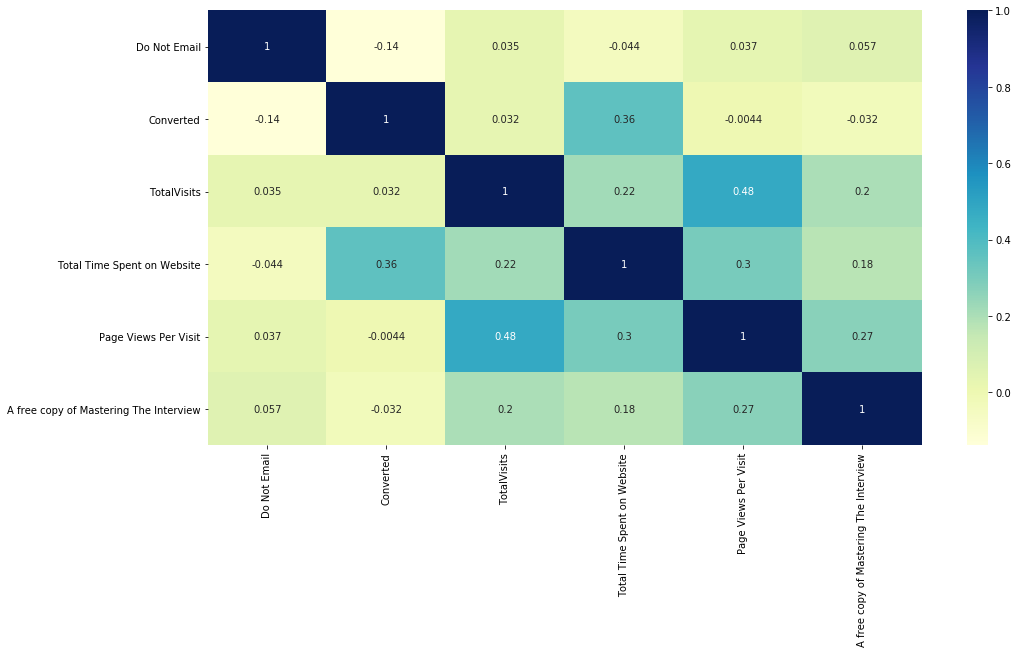

In [84]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of converted with independent variables:
- ```converted``` is highly (positively) correlated with ```Total Time spent on website```

- ```converted``` is most strongly negatively correlated to ```Do not Email```. This suggest that those prospects who do not want to be contacted by Email have lower probability of conversion

Correlation among independent variables:
- ```Total Visit``` and ```Page Views Per Visit```, are positively correlated 


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format.

In [85]:
# Let's check for any outliers
leads.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079205,0.379216,3.445018,483.773921,2.293420,0.317258
std,0.270073,0.485219,4.854963,545.519186,2.165968,0.465434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,247.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,924.000000,3.000000,1.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model. First, let's take a look at the dataset again.

In [86]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,unknown,Unemployed,0,Modified
1,API,Organic Search,0,0,5,674,2,Email Opened,India,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,India,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,Others,India,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,India,Unemployed,0,Modified


Let's now create dummy variables for the categorical variables

In [87]:
# Subset all categorical variables
leads_categorical = leads.select_dtypes(include=['object'])
leads_categorical.head()

,Lead Origin,Lead Source,Last Activity,Country,What is your current occupation,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,unknown,Unemployed,Modified
1,API,Organic Search,Email Opened,India,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Student,Email Opened
3,Landing Page Submission,Direct Traffic,Others,India,Unemployed,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Unemployed,Modified


In [88]:
# Convert into dummies
leads_dummies = pd.get_dummies(leads_categorical, drop_first=True)
leads_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [89]:
# Drop categorical variable columns
leads = leads.drop(list(leads_categorical.columns), axis=1)

In [90]:
# Concatenate dummy variables with X
leads = pd.concat([leads, leads_dummies], axis=1)

In [91]:
# Let's check the first few rows
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,5,674,2,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,1,2,1532,2,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,305,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,1,2,1428,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


### Test-Train Split



In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,5,674,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,2,1532,2,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,1,305,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,2,1428,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [94]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling


In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7963,0,1.268624,2.486792,-0.133238,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5521,1,0.687761,-0.836090,2.124718,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1951,0,-0.086722,1.828055,0.318353,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1553,0,0.106899,1.307999,-0.133238,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
9170,0,-0.667585,-0.890832,-1.036420,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [98]:
### Checking the Conversion Rate
convo_rate = (sum(leads_numeric['Converted'])/len(leads_numeric['Converted'].index))*100
convo_rate

37.92156431945513

#### we have almost 37.9% as our conversion rate

### Looking at Correlations

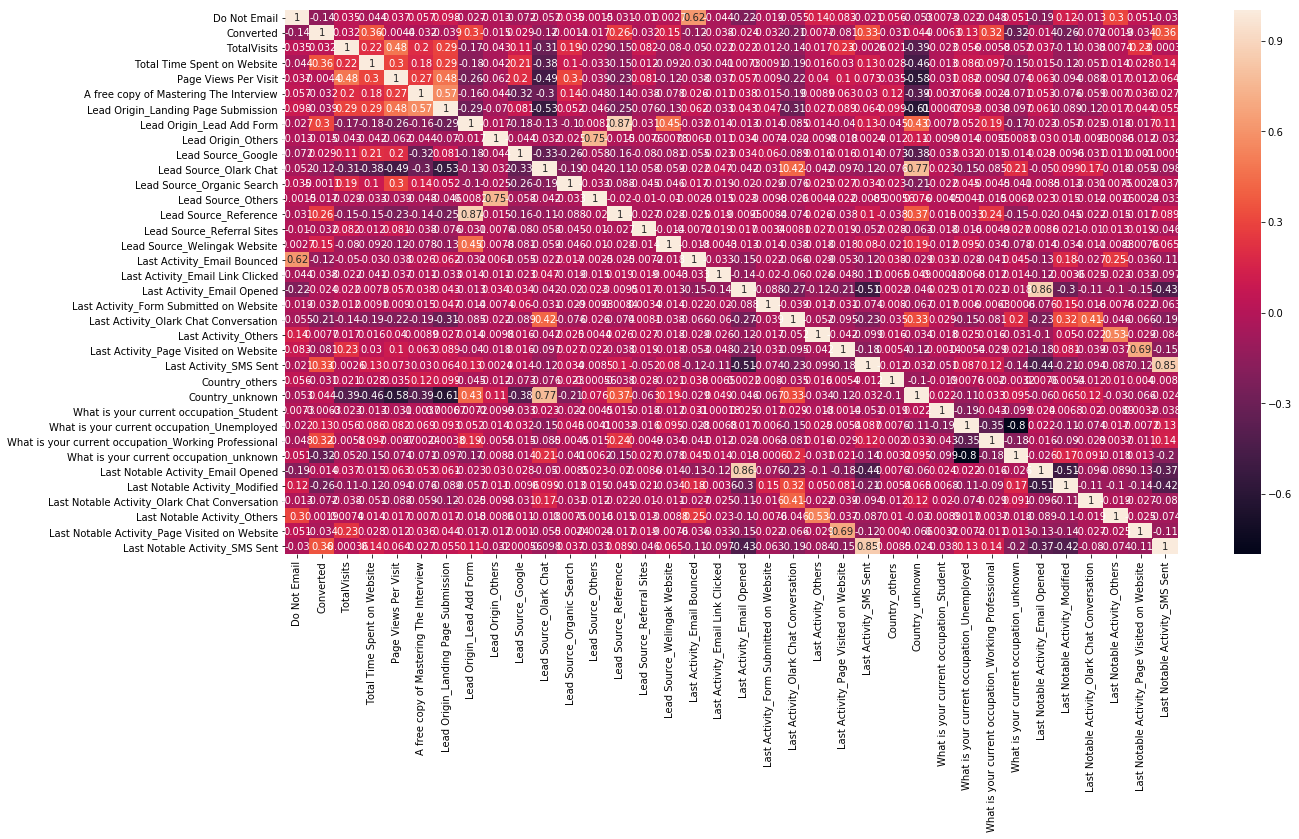

In [99]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Model Building

In [100]:
import statsmodels.api as sm

In [101]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.8
Date:                Mon, 10 Jun 2019   Deviance:                       5089.6
Time:                        13:06:59   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0026      0.688     -1.456      0.145      -2.352       0.347
Do Not Email                                            -1.2530      0.205     -6.121      0.000      -1.654      -0.852
TotalVisits                                              0.1932      0.054      3.569      0.000       0.087       0.299
Total Time Spent on Website                              1.1288      0.042     27.130      0.000       1.047       1.210
Page Views Per Visit                                    -0.0934      0.052     -1.804      0.071      -0.195       0.008
A free copy of Mastering The Interview                   0.1063      0.108      0.982      0.326      -0.106       0.319
Lead Origin_Landing Page Submission                     -0.2470      0.108     -2.279      0.023      -0.459      -0.035
Lead Origin_Lead Add Form                                0.9187      1.029      0.893      0.372      -1.098       2.935
Lead Origin_Others                                      -0.3170      0.845     -0.375      0.708      -1.974       1.340
Lead Source_Google                                       0.3871      0.116      3.345      0.001       0.160       0.614
Lead Source_Olark Chat                                   0.9254      0.263      3.520      0.000       0.410       1.441
Lead Source_Organic Search                               0.2296      0.128      1.789      0.074      -0.022       0.481
Lead Source_Others                                       0.5600      0.670      0.836      0.403      -0.753       1.873
Lead Source_Reference                                    2.3315      1.041      2.240      0.025       0.291       4.372
Lead Source_Referral Sites                               0.0108      0.379      0.028      0.977      -0.732       0.754
Lead Source_Welingak Website                             4.7289      1.433      3.299      0.001       1.920       7.538
Last Activity_Email Bounced                             -0.6248      0.448     -1.394      0.163      -1.504       0.254
Last Activity_Email Link Clicked                         0.4684      0.399      1.174      0.240      -0.313       1.250
Last Activity_Email Opened                               0.7485      0.243      3.084      0.002       0.273       1.224
Last Activity_Form Submitted on Website                  0.3400      0.390      0.871      0.384      -0.425       1.105
Last Activity_Olark Chat Conversation                   -0.5386      0.272     -1.979      0.048      -1.072      -0.005
Last Activity_Others                                     0.2449      0.378      0.648      0.517      -0.496       0.985
Last Activity_Page Visited on Website                    0.2052      0.292      0.703      0.482      -0.367       0.777
Last Activity_SM

### Feature Selection using RFE

In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [103]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
        True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True,  True, False, False, False,  True, False,  True])

In [105]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', False, 19),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Others', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 8),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_others', Fals

In [106]:
col = X_train.columns[rfe.support_]

In [107]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Country_others',
       'Country_unknown', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

##### Assessing the model with StatsModels

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.4
Date:                Mon, 10 Jun 2019   Deviance:                       5210.8
Time:                        13:07:00   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1414      0.484     -0.292      0.770      -1.090       0.807
Do Not Email                                            -1.3660      0.197     -6.919      0.000      -1.753      -0.979
Total Time Spent on Website                              1.1179      0.040     27.671      0.000       1.039       1.197
Lead Origin_Lead Add Form                                1.7882      0.946      1.890      0.059      -0.066       3.643
Lead Source_Olark Chat                                   1.4116      0.106     13.284      0.000       1.203       1.620
Lead Source_Reference                                    1.9653      0.969      2.027      0.043       0.065       3.865
Lead Source_Welingak Website                             4.4093      1.383      3.189      0.001       1.699       7.120
Last Activity_Email Bounced                             -1.1706      0.359     -3.260      0.001      -1.874      -0.467
Last Activity_Olark Chat Conversation                   -1.2665      0.162     -7.815      0.000      -1.584      -0.949
Last Activity_SMS Sent                                   0.3973      0.148      2.678      0.007       0.107       0.688
What is your current occupation_Student                 -0.9295      0.528     -1.760      0.078      -1.964       0.105
What is your current occupation_Unemployed              -1.0277      0.485     -2.118      0.034      -1.979      -0.077
What is your current occupation_Working Professional     1.3559      0.516      2.630      0.009       0.345       2.366
What is your current occupation_unknown                 -2.2123      0.490     -4.518      0.000      -3.172      -1.253
Last Notable Activity_Others                             1.6166      0.289      5.590      0.000       1.050       2.183
Last Notable Activity_SMS Sent                           1.1342      0.157      7.247      0.000       0.827       1.441
========================================================================================================================
"""

In [109]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7963    0.987773
5521    0.009430
1951    0.705675
1553    0.572755
9170    0.320092
5097    0.125878
8953    0.467339
308     0.424587
5520    0.114804
1045    0.180914
dtype: float64

In [110]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98777309, 0.00943029, 0.70567451, 0.57275452, 0.32009234,
       0.12587807, 0.46733895, 0.424587  , 0.11480443, 0.18091411])

##### Creating a dataframe with the actual Convertibility flag and the predicted probabilities

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Num'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Num
0,1,0.987773,7963
1,0,0.009430,5521
2,1,0.705675,1951
3,1,0.572755,1553
4,0,0.320092,9170


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [112]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Num,predicted
0,1,0.987773,7963,1
1,0,0.009430,5521,0
2,1,0.705675,1951,1
3,1,0.572755,1553,1
4,0,0.320092,9170,0


In [113]:
from sklearn import metrics

In [114]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3470  451]
 [ 752 1699]]


In [115]:
# Predicted     not_converted    converted
# Actual
# not_converted        3469      452
# converted            752       1699 

In [116]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8112052730696798


#### Checking VIFs

In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,73.49
4,Lead Source_Reference,57.35
5,Lead Source_Welingak Website,17.20
8,Last Activity_SMS Sent,5.56
14,Last Notable Activity_SMS Sent,5.05
0,Do Not Email,1.86
3,Lead Source_Olark Chat,1.82
6,Last Activity_Email Bounced,1.73
10,What is your current occupation_Unemployed,1.67
7,Last Activity_Olark Chat Conversation,1.47


In [119]:
# There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 
#The variable 'Lead Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [120]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [121]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.3
Date:                Mon, 10 Jun 2019   Deviance:                       5214.7
Time:                        13:07:01   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1397      0.484     -0.289      0.773      -1.088       0.809
Do Not Email                                            -1.3678      0.197     -6.930      0.000      -1.755      -0.981
Total Time Spent on Website                              1.1164      0.040     27.649      0.000       1.037       1.196
Lead Source_Olark Chat                                   1.4105      0.106     13.280      0.000       1.202       1.619
Lead Source_Reference                                    3.7484      0.224     16.722      0.000       3.309       4.188
Lead Source_Welingak Website                             6.1924      1.011      6.123      0.000       4.210       8.174
Last Activity_Email Bounced                             -1.1707      0.359     -3.262      0.001      -1.874      -0.467
Last Activity_Olark Chat Conversation                   -1.2698      0.162     -7.838      0.000      -1.587      -0.952
Last Activity_SMS Sent                                   0.3944      0.148      2.660      0.008       0.104       0.685
What is your current occupation_Student                 -0.9297      0.528     -1.761      0.078      -1.964       0.105
What is your current occupation_Unemployed              -1.0241      0.485     -2.111      0.035      -1.975      -0.073
What is your current occupation_Working Professional     1.3554      0.516      2.629      0.009       0.345       2.366
What is your current occupation_unknown                 -2.2120      0.490     -4.518      0.000      -3.172      -1.252
Last Notable Activity_Others                             1.6139      0.289      5.582      0.000       1.047       2.181
Last Notable Activity_SMS Sent                           1.1348      0.156      7.253      0.000       0.828       1.442
========================================================================================================================
"""

In [122]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [123]:
y_train_pred[:10]

array([0.98770663, 0.00944377, 0.7061925 , 0.57356034, 0.32129401,
       0.1261168 , 0.46737774, 0.42437657, 0.11546685, 0.18177082])

In [124]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [125]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Num,predicted
0,1,0.987707,7963,1
1,0,0.009444,5521,0
2,1,0.706193,1951,1
3,1,0.573560,1553,1
4,0,0.321294,9170,0


In [126]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8107344632768362


##### Let's check the VIFs again

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.56
13,Last Notable Activity_SMS Sent,5.05
0,Do Not Email,1.86
2,Lead Source_Olark Chat,1.82
5,Last Activity_Email Bounced,1.73
9,What is your current occupation_Unemployed,1.66
6,Last Activity_Olark Chat Conversation,1.47
11,What is your current occupation_unknown,1.46
1,Total Time Spent on Website,1.31
3,Lead Source_Reference,1.23


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [128]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3468,  453],
       [ 753, 1698]], dtype=int64)

In [129]:
# Predicted     not_converted    converted
# Actual
# not_converted        3470      451
# converted            754       1697 

In [130]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8107344632768362

### Metrics beyond accuracy

In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.6927784577723378

In [133]:
# Specificity
TN / float(TN+FP)

0.8844682478959449

In [134]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11553175210405509


In [135]:
# positive predictive value 
print (TP / float(TP+FP))

0.7894002789400278


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8216062544420754


#### Plotting the ROC Curve

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


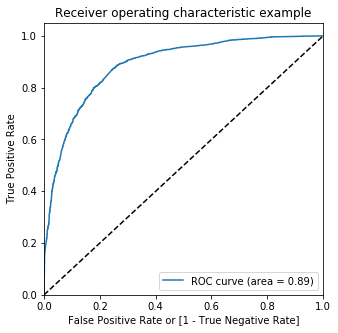

In [139]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Num,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.987707,7963,1,1,1,1,1,1,1,1,1,1,1
1,0,0.009444,5521,0,1,0,0,0,0,0,0,0,0,0
2,1,0.706193,1951,1,1,1,1,1,1,1,1,1,0,0
3,1,0.573560,1553,1,1,1,1,1,1,1,0,0,0,0
4,0,0.321294,9170,0,1,1,1,1,0,0,0,0,0,0


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.586158  0.982456  0.338434
0.2   0.2  0.768205  0.913913  0.677123
0.3   0.3  0.797866  0.874337  0.750064
0.4   0.4  0.811048  0.778866  0.831166
0.5   0.5  0.810734  0.692778  0.884468
0.6   0.6  0.804457  0.621379  0.918898
0.7   0.7  0.779661  0.511628  0.947207
0.8   0.8  0.760044  0.427173  0.968120
0.9   0.9  0.707627  0.262750  0.985718


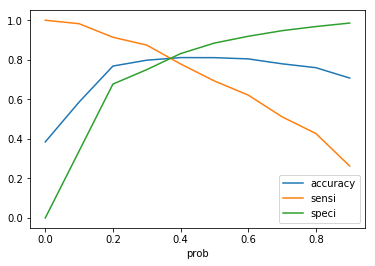

In [142]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Num,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.987707,7963,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.009444,5521,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.706193,1951,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.573560,1553,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.321294,9170,0,1,1,1,1,0,0,0,0,0,0,0


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8110483364720653

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3259,  662],
       [ 542, 1909]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7788657690738474

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.831165519000255

In [149]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16883448099974496


In [150]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7425126409957216


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8574059458037359


#### Precision and recall

In [152]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3468,  453],
       [ 753, 1698]], dtype=int64)

In [153]:
# Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7894002789400278

In [154]:
# Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6927784577723378

In [155]:
from sklearn.metrics import precision_score, recall_score

In [156]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7894002789400278

In [157]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6927784577723378

#### Precision and recall tradeoff

In [158]:
from sklearn.metrics import precision_recall_curve

In [159]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
 5       0
 6       1
 7       0
 8       0
 9       1
 10      0
 11      0
 12      0
 13      0
 14      0
 15      1
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      1
 26      1
 27      0
 28      0
 29      0
        ..
 6342    0
 6343    1
 6344    0
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    1
 6351    1
 6352    1
 6353    1
 6354    0
 6355    0
 6356    0
 6357    0
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 6363    1
 6364    1
 6365    0
 6366    0
 6367    0
 6368    1
 6369    0
 6370    0
 6371    0
 Name: Converted, Length: 6372, dtype: int64, 0       1
 1       0
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      1
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      

In [160]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

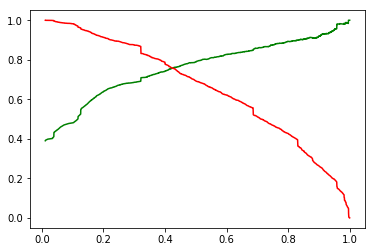

In [161]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [162]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [163]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3497,0,-0.890832,0,1,0,0,0,0,0,1,0,0,0,0
4044,0,-0.890832,1,0,0,0,0,1,0,1,0,0,0,1
7200,0,-0.617119,0,0,0,0,0,0,0,1,0,0,0,0
1183,0,-0.890832,1,0,0,1,0,0,0,1,0,0,0,0
8216,0,-0.826966,0,0,0,0,0,0,0,0,0,1,0,0


In [164]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [165]:
y_test_pred = res.predict(X_test_sm)

In [166]:
y_test_pred[:10]

3497    0.830623
4044    0.685986
7200    0.135552
1183    0.128025
8216    0.036442
8746    0.321294
9047    0.060355
6526    0.533432
7694    0.126117
8184    0.901564
dtype: float64

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3497,0.830623
4044,0.685986
7200,0.135552
1183,0.128025
8216,0.036442


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting Lead Num to index
y_test_df['Lead Num'] = y_test_df.index

In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Num,0
0,1,3497,0.830623
1,1,4044,0.685986
2,0,7200,0.135552
3,0,1183,0.128025
4,0,8216,0.036442


In [172]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [173]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Num','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Lead Num,Converted,Converted_Prob
0,3497,1,0.830623
1,4044,1,0.685986
2,7200,0,0.135552
3,1183,0,0.128025
4,8216,0,0.036442


In [174]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Lead Num,Converted,Converted_Prob,final_predicted
0,3497,1,0.830623,1
1,4044,1,0.685986,1
2,7200,0,0.135552,0
3,1183,0,0.128025,0
4,8216,0,0.036442,0


In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8150860490662761

In [176]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1473,  257],
       [ 248,  753]], dtype=int64)

In [177]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7522477522477522

In [179]:
# Let us calculate specificity
TN / float(TN+FP)

0.8514450867052024

### Assigning Score to all the Leads

In [180]:
score1 = y_pred_final[['Lead Num','Converted','Converted_Prob']]
score1.head()

,Lead Num,Converted,Converted_Prob
0,3497,1,0.830623
1,4044,1,0.685986
2,7200,0,0.135552
3,1183,0,0.128025
4,8216,0,0.036442


In [181]:
score2 = y_train_pred_final[['Lead Num','Converted','Converted_Prob']]
score2.head()

,Lead Num,Converted,Converted_Prob
0,7963,1,0.987707
1,5521,0,0.009444
2,1951,1,0.706193
3,1553,1,0.573560
4,9170,0,0.321294


In [182]:
score = score1.append(score2, ignore_index=True)

In [183]:
score.sort_values("Lead Num", inplace=True)
score

,Lead Num,Converted,Converted_Prob
2167,0,0,0.321294
3744,1,0,0.313178
9076,2,1,0.742107
1748,3,0,0.176973
4579,4,1,0.679323
3633,5,0,0.038956
8739,6,1,0.765402
8643,7,0,0.038956
4757,8,0,0.039106
4724,9,0,0.038123


In [184]:
# Let us add a column Lead Score which can be derived as Converted_Prob * 100, and we consider only the Integer Part

score['Lead Score'] = round(score['Converted_Prob'] * 100)
score['Lead Score'] = score['Lead Score'].astype(np.int64)
score.head()

,Lead Num,Converted,Converted_Prob,Lead Score
2167,0,0,0.321294,32
3744,1,0,0.313178,31
9076,2,1,0.742107,74
1748,3,0,0.176973,18
4579,4,1,0.679323,68


In [185]:
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
names = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60', '61-70', '71-80', '81-90', '91-100']

score['Score Range'] = pd.cut(score['Lead Score'], bins, labels=names)
score

,Lead Num,Converted,Converted_Prob,Lead Score,Score Range
2167,0,0,0.321294,32,31-40
3744,1,0,0.313178,31,31-40
9076,2,1,0.742107,74,71-80
1748,3,0,0.176973,18,11-20
4579,4,1,0.679323,68,61-70
3633,5,0,0.038956,4,0-10
8739,6,1,0.765402,77,71-80
8643,7,0,0.038956,4,0-10
4757,8,0,0.039106,4,0-10
4724,9,0,0.038123,4,0-10


In [186]:
score[score.Converted == 0].groupby('Score Range')['Converted'].count()

Score Range
0-10      1985
11-20     1907
21-30      371
31-40      465
41-50      290
51-60      182
61-70      159
71-80      125
81-90       99
91-100      68
Name: Converted, dtype: int64

In [187]:
score[score.Converted == 1].groupby('Score Range')['Converted'].count()

Score Range
0-10       64
11-20     249
21-30     130
31-40     346
41-50     296
51-60     248
61-70     384
71-80     277
81-90     566
91-100    892
Name: Converted, dtype: int64

In [188]:
# Conversion Percentage for each bin
(score[score.Converted == 1].groupby('Score Range')['Converted'].count() / score.groupby('Score Range')['Converted'].count()) * 100

Score Range
0-10       3.123475
11-20     11.549165
21-30     25.948104
31-40     42.663379
41-50     50.511945
51-60     57.674419
61-70     70.718232
71-80     68.905473
81-90     85.112782
91-100    92.916667
Name: Converted, dtype: float64

In [189]:
# On Examination, It appears that a Lead Score of around 56 will result in a Conversion Ration of 80%
bins = [-1, 55, 100]
names = ['0-55', '56-100']

score['Score Range New'] = pd.cut(score['Lead Score'], bins, labels=names)
score.head()

,Lead Num,Converted,Converted_Prob,Lead Score,Score Range,Score Range New
2167,0,0,0.321294,32,31-40,0-55
3744,1,0,0.313178,31,31-40,0-55
9076,2,1,0.742107,74,71-80,56-100
1748,3,0,0.176973,18,11-20,0-55
4579,4,1,0.679323,68,61-70,56-100


In [190]:
# Conversion Percentage for each bin
(score[score.Converted == 1].groupby('Score Range New')['Converted'].count() / score.groupby('Score Range New')['Converted'].count()) * 100

Score Range New
0-55      18.957871
56-100    80.853352
Name: Converted, dtype: float64

### A Lead Score of 56 and Above should result in 80% Hit Rate